In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
data['male'] = data['gender'] == 'M'
data = data.dropna(axis=1, how='any')
data = data.dropna(axis=0, how='any')

In [31]:
data['male'] = data['male'].apply(lambda x: 1 if x == True else 0)

In [32]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k,male
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43,1
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10,0
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10,1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95,0
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72,1


In [33]:
data.describe()

,division,age,official,genderdiv,overall,pace,male
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658,0.550807
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486,0.497420
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000,0.000000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000,0.000000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000,1.000000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000,1.000000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000,1.000000


In [34]:
data_nums = data[['division', 'age', 'official', 'genderdiv', 'overall', 'pace', 'male']]
X = data_nums.iloc[:, 0:6]
y = data_nums.iloc[:, 6]

In [35]:
y

0        1
1        0
2        1
3        0
4        1
5        0
6        1
7        1
8        1
9        1
10       0
11       1
12       1
13       0
14       1
15       0
16       1
17       0
18       1
19       0
20       1
21       0
22       1
23       1
24       1
25       0
26       1
27       1
28       0
29       1
        ..
31954    1
31955    1
31956    1
31957    0
31958    1
31959    0
31960    1
31961    0
31962    0
31963    1
31964    1
31965    1
31966    1
31967    0
31968    0
31969    0
31970    1
31971    0
31972    1
31973    1
31974    0
31975    1
31976    1
31977    1
31978    1
31979    1
31980    1
31981    0
31982    0
31983    1
Name: male, Length: 31984, dtype: int64

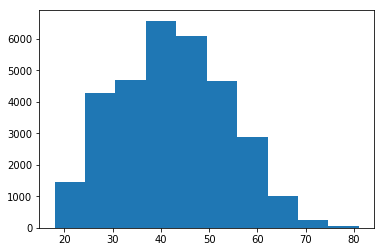

In [36]:
plt.hist(data['age']);

In [37]:
#sns.swarmplot(x="age", y="pace", hue="male", data=data)

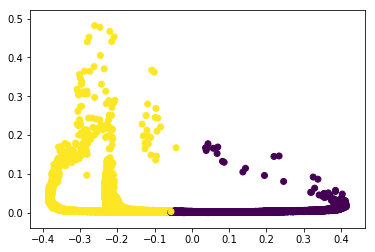

Comparing k-means clusters against the data:
male       0      1
row_0              
0      14344   7412
1         23  10205


In [38]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to five components.
X_pca = PCA(5).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_norm[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [39]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [40]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred)

col_0,0,1
male,,
0,14344,23
1,7412,10205


In [41]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.2853327855805954

In [42]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0      0      1
row_0              
0       7412  10226
1      14344      2


In [43]:
from sklearn import metrics
    
metrics.adjusted_rand_score(predict_mini, y_pred)

0.2867168081539945

In [44]:
#Divide into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.05, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 21


In [46]:
#plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
#plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Comparing the assigned categories to the ones in the data:
col_0   0    1    2    3    4    5    6    7    8    9   ...   11   12   13  \
male                                                     ...                  
0       44    0  172  193    0  171    0    0    0  142  ...    0  110    0   
1      380  360    0    0  166    0  140  178  176    0  ...  111    0  129   

col_0  14  15   16  17   18  19  20  
male                                 
0      88  87  107  84  102  64  62  
1       0   7    0   0    0   0   0  

[2 rows x 21 columns]


In [47]:

from sklearn import metrics
    
metrics.adjusted_rand_score(y_train, labels)

0.1095715449477131

In [48]:

from sklearn.cluster import SpectralClustering

n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.


c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
c:

c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
c:

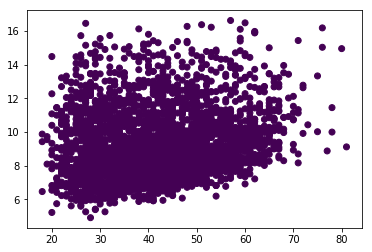

Comparing the assigned categories to the ones in the data:
col_0     0
male       
0      1426
1      1772


In [49]:
plt.scatter(X_train['age'], X_train['pace'], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


In [50]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y_train, predict)

0.0

In [51]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 1189
